# Exercise 3.1
Your first task is to simulate and plot the correlated time series

$x_{t+1}=\alpha x_{t} + \epsilon_{t+1}$ where $x_{0} = 0$ and $t = 0,...,T$

The sequence of shocks ${\epsilon_{t}}$ is assumed to be IID and standard normal.

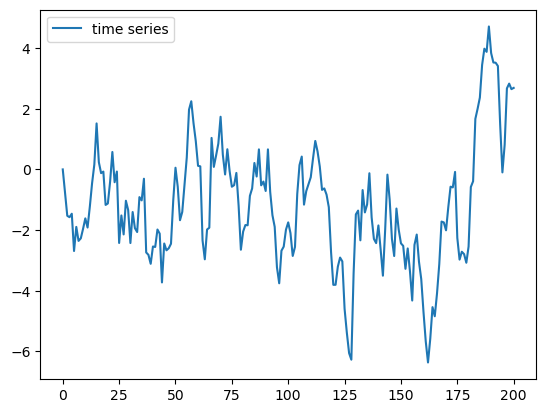

In [13]:
import numpy as np
import matplotlib.pyplot as plt

'''
SOLUTION NOTES: 
* Since I'm not plotting the epsilon values, I don't need to store them. I can just create a random number and add it on to the time series. Other than that, this was a good solution.
    > for t in range(T):
    >    x_values[t+1] = a * x_values[t] + np.random.randn()
'''

T = 200                     # final time
a = 0.9                     # scalar
e_values = np.empty(T+1)    # sequence of shocks -- empty numpy array
e_values[0] = 0             # initializes e_0 = 0
x_values = np.empty(T+1)           # stores all x_t to be displayed in the pyplot
x_values[0] = 0                    # intializes x_0 = 0

for t in range(T):
    e = np.random.randn() # generates a random epislon value
    e_values[t+1] = e # assigns the value to the following index of the sequence of shocks
    x_values[t+1] = (a * x_values[t]) + e_values[t+1] # calculates the provided equation

plt.plot(x_values, label='time series')
plt.legend()
plt.show()

# Exercise 3.2
Starting with your solution to exercise 1, plot three simulated time series, one for each of the cases a = 0, a = 0.8, a = 0.98.

Use a for loop to step through the $\alpha$ values. If you can, add a legend, to help distinguish between the three time series.

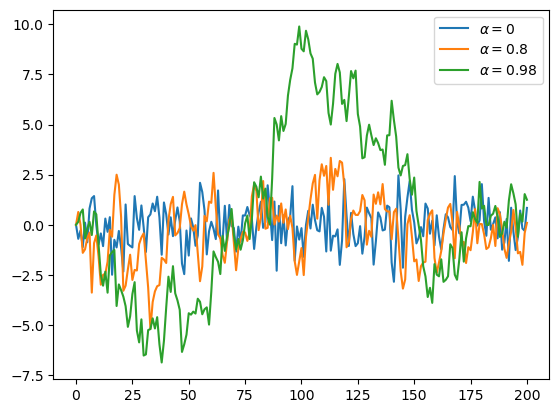

In [14]:
T = 200
alpha_values = [0, 0.8, 0.98]

'''
SOLUTION NOTES:
* Good. But it's not necessary to initialize the x_values inside of the outer loop. The equation in the inner for loop already redefines the values of the array.
    > T = 200
    > alpha_values = [0, 0.8, 0.98]
    > x_values = np.empty(T+1)

    > for a in alpha_values: ...
'''

for a in alpha_values:
    x_values = np.empty(T+1)
    x_values[0] = 0
    for t in range (T):
        x_values[t+1] = a * x_values[t] + np.random.randn()
    plt.plot(x_values, label=f'$\\alpha = {a}$')

plt.legend()
plt.show()

## Exercise 3.3
Similar to the previous exercises, plot the time series

$x_{t+1} = \alpha \lvert (x_t) \rvert + \epsilon_{t+1}$ where $x_0 = 0$ and $t = 0,...,T$

Use $T = 200, \alpha = 0.9$ and ${\epsilon_{t}}$ as before.

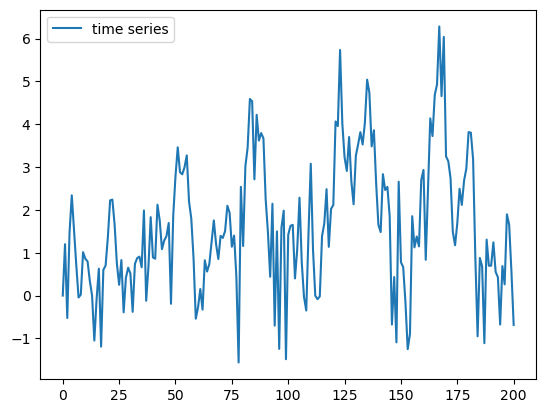

In [15]:
T = 200
a = 0.9
x_values = np.empty(T+1)
x_values[0] = 0

'''
SOLUTION NOTES:
* Good. It's useful to know that the numPy library has a built-in method abs() which will take the absolute value of a number.
'''

for t in range(T):
    x_values[t+1] = a * np.abs(x_values[t]) + np.random.randn()

plt.plot(x_values, label='time series')
plt.legend()
plt.show()

# Exercise 3.4

Use the same solution from 3.3, but create an if-else statement that can be used to find the absolute value of $x_t$ without a built-in method.

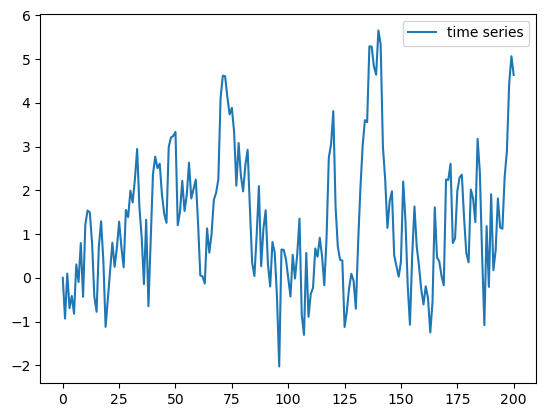

In [16]:
T = 200
a = 0.9
x_values = np.empty(T+1)
x_values[0] = 0

'''
SOLUTION NOTES:
* Unlike Java, you do not need to initialize the value outside of the if-else statement. Simply absolute_value_of_x to its negative equivalent will work here.
    > for t in range(T):
    >   if (x_values[t] < 0):
    >       abs_x = - x[t]
    >   else:
    >       abs_x = x[t]
'''

for t in range(T):
    absolute_value_of_x = 0;
    if x_values[t] < 0:
        absolute_value_of_x *= -1
    else:
        absolute_value_of_x = x_values[t]

    x_values[t+1] = a * absolute_value_of_x + np.random.randn()

plt.plot(x_values, label='time series')
plt.legend()
plt.show()

# Exercise 3.5

Compute an approximation to $\pi$ using Monte Carlo. Use no imports besides

` import numpy as np `

In [17]:
import numpy as np

'''
SOLUTION NOTES:
Not really close. First, the sample size needs to be large, the points fall within the boundary of a center circle, and you need to record which points fall within the circle.
Let's review the goal of the exercise: **COMPUTE AN APPROXIMATION TO PI** USING MONTE CARLO.

n = 100000 # You make a sample size large enough to run a sufficient test

count = 0 # Start the count at 0
for i in range(n): # Iterate for n times these commands
    u, v = np.random.uniform(), np.random.uniform() # Create a point of x and y-coordinates in between the values 0 and 1.

    d = np.sqrt((u-0.5)**2 + (v-0.5)**2) # The formula to find the distance from both points u and v to the origin. Distance = \sqrt{(u - 0.5)^2 + (v-0.5)^2} 

    if d < 0.5: # Because we are looking at a unit circle of bound 0.5, we are looking to see if the distance from the point to the origin is inside of the circle
        count += 1 # If true, then we add it to a count

area_estimate = count / n # To estimate the area we divide the number of points inside of the unit circle by the total number of trials fixed beforehand.
print(area_estimate  * 4) # Divides the radius 2 before printing. We should get a number close to pi.
'''

N = 200.0     # Max trials
X_MIN = 0
Y_MIN = 0
Y_MAX = 1
X_MAX = 1

points = [] # Populates a points array

# Find the mean and construct a probability distribution.
i = 0
while i < N:
    points.append(np.random.uniform(X_MIN, X_MAX))
    i += 1

mean = np.sum(points) / N

standard_deviation_at_points = []
for point in points:
    standard_deviation_at_points.append((point-mean) * (point-mean))

standard_deviation = np.sqrt(np.sum(standard_deviation_at_points) / 1)

print(mean)
print(standard_deviation)

0.513372535939267
4.378790825291479
